$x$ : número de mesas fabricadas   
$y$ : número de sillas fabricadas  

Maximizar $z = 8x + 5y$   
sujeto a   
$x + y <= 6$  
$9x + 5y <= 45$  

In [2]:
#%pip install pulp

import pulp

In [9]:
problema = pulp.LpProblem("Beneficio",pulp.LpMaximize)
problema

Beneficio:
MAXIMIZE
None
VARIABLES

In [10]:
# Variables de decisión
x = pulp.LpVariable("x",lowBound=0,cat='Integer') 
y = pulp.LpVariable("y",lowBound=0,cat='Integer') 

# Función objetivo
problema += 8*x + 5*y

# Restricciones
problema += x + y <= 6
problema += 9*x + 5*y <= 45

In [11]:
sol = problema.solve()
sol

1

In [12]:
print("z_max = {0:.1f}, x = {1:.1f}, y = {2:.1f}".
      format(pulp.value(problema.objective),pulp.value(x),pulp.value(y)))

z_max = 40.0, x = 5.0, y = 0.0


In [13]:
#%pip install mip

import mip

In [14]:
problema = mip.Model("Beneficio")
problema

In [15]:
# Variables de decisión
x = [problema.add_var(var_type=mip.INTEGER) for i in range(1)]
y = [problema.add_var(var_type=mip.INTEGER) for i in range(1)]

# Función objetivo
problema.objective = mip.maximize(8*x[0] + 5*y[0])

# Restricciones
problema += x[0] + y[0] <= 6
problema += 9*x[0] + 5*y[0] <= 45 

In [16]:
sol = problema.optimize()
sol

<OptimizationStatus.OPTIMAL: 0>

In [17]:
print("z_max = {0:.1f}, x = {1:.1f}, y = {2:.1f}".
      format(problema.objective_value,x[0].x,y[0].x))

z_max = 40.0, x = 5.0, y = 0.0


In [21]:
%pip install matplotlib
%pip install numpy
%pip install shapely


     ---------------------------------------- 7.8/7.8 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB ? eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 10.9 MB/s eta 0:00:00
     ------------------------------------- 216.0/216.0 kB 12.9 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 11.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.4/1.4 MB 10.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:

import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

$x + y <= 6  ->  y1 = 6 - x$  
$9x + 5y <= 45  ->  5y = 45 - 9x  ->  y2 = (45 - 9x)/5$   
$x >= 0  ->  x = 0  ->  x1 = 0y$    
$y >= 0  ->  y = 0  ->  y3 = 0x$

In [23]:
# Ecuaciones e intervalos para tabular
x = np.arange(-1, 7, 1)
y = np.arange(-2, 12, 1)
y1 = 6 - x
y2 = (45 - 9*x)/5
x1 = 0*y
y3 = 0*x

In [24]:
# Identificadores para las líneas
primera_linea = LineString(np.column_stack((x, y1)))
segunda_linea = LineString(np.column_stack((x, y2)))
tercera_linea = LineString(np.column_stack((x, y3)))
cuarta_linea = LineString(np.column_stack((x1, y)))

In [25]:
# Generando las intersecciones (vértices)
primera_interseccion = primera_linea.intersection(cuarta_linea)
segunda_interseccion = cuarta_linea.intersection(tercera_linea)
tercera_interseccion = tercera_linea.intersection(segunda_linea)
cuarta_interseccion = segunda_linea.intersection(primera_linea)

In [26]:
#Identificando los valores de las coordenadas x e y de cada vertice

xi1m, yi1m = primera_interseccion.xy
xi2m, yi2m = segunda_interseccion.xy
xi3m, yi3m = tercera_interseccion.xy
xi4m, yi4m = cuarta_interseccion.xy

In [27]:
# Cambiamos el formato de matriz a float
xi1 = np.float64(np.array(xi1m))
xi2 = np.float64(np.array(xi2m))
xi3 = np.float64(np.array(xi3m))
xi4 = np.float64(np.array(xi4m))
yi1 = np.float64(np.array(yi1m))
yi2 = np.float64(np.array(yi2m))
yi3 = np.float64(np.array(yi3m))
yi4 = np.float64(np.array(yi4m))

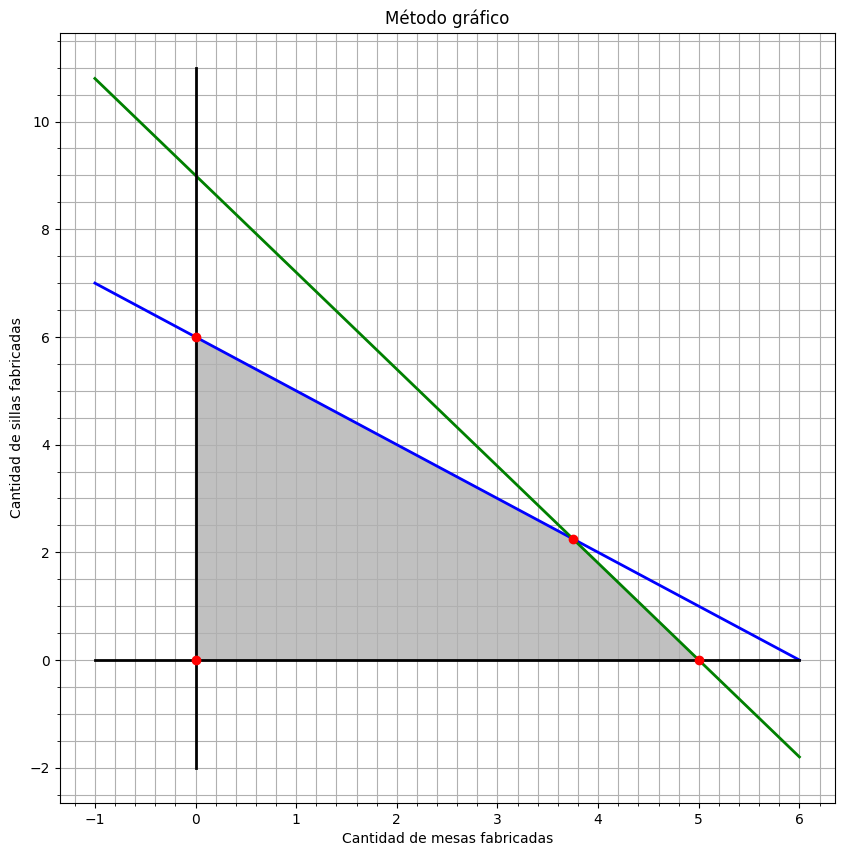

In [28]:
# Graficando la región factible del PLR
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]
plt.figure(figsize=(10,10))
plt.plot(x, y1, '-', linewidth=2, color='blue')
plt.plot(x, y2, '-', linewidth=2, color='green')
plt.plot(x, y3, '-', linewidth=2, color='black')
plt.plot(x1, y, '-', linewidth=2, color='black')

plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')
plt.plot(*cuarta_interseccion.xy, 'o', color='red')

plt.fill(m, n, color='silver')
plt.minorticks_on()
plt.grid(which='both')
plt.xlabel('Cantidad de mesas fabricadas')
plt.ylabel('Cantidad de sillas fabricadas')
plt.title('Método gráfico')
plt.show()

In [29]:
# Imprimiendo las coordenadas de los vértices
print('COORDENADAS DE LAS INTERSECCIONES \n')
print('(x1, y1): {} '.format(primera_interseccion))
print('(x2, y2): {} '.format(segunda_interseccion))
print('(x3, y3): {} '.format(tercera_interseccion))
print('(x4, y4): {} '.format(cuarta_interseccion))

COORDENADAS DE LAS INTERSECCIONES 

(x1, y1): POINT (0 6) 
(x2, y2): POINT (0 0) 
(x3, y3): POINT (5 0) 
(x4, y4): POINT (3.75 2.25) 


In [30]:
# Generando los pares ordenados enteros
x0i = np.arange(0,6,1)
y0i = np.zeros(6)
x1i = np.arange(0,5,1)
y1i = np.zeros(5) + 1
x2i = np.arange(0,4,1)
y2i = np.zeros(4) + 2
x3i = np.arange(0,4,1)
y3i = np.zeros(4) + 2
x4i = np.arange(0,4,1)
y4i = np.zeros(4) + 3
x5i = np.arange(0,3,1)
y5i = np.zeros(3) + 4
x6i = np.arange(0,2,1)
y6i = np.zeros(2) + 5
x7i = np.arange(0,1,1)
y7i = np.zeros(1) + 6

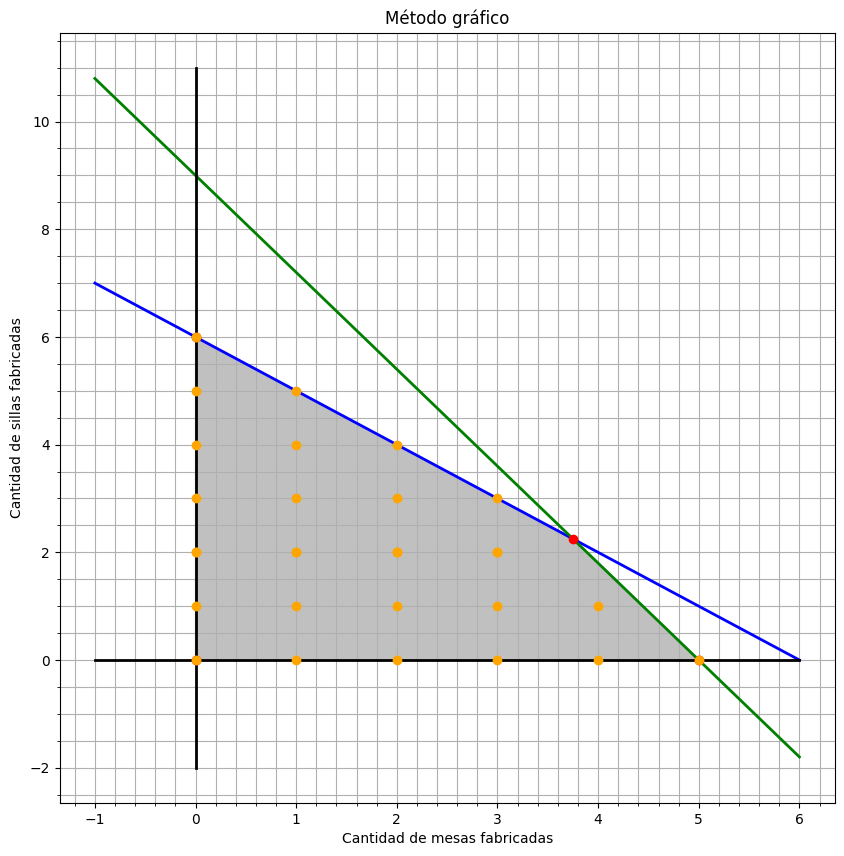

In [31]:
# Graficando la región factible del PLE
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]
plt.figure(figsize=(10,10))
plt.plot(x, y1, '-', linewidth=2, color='blue')
plt.plot(x, y2, '-', linewidth=2, color='green')
plt.plot(x, y3, '-', linewidth=2, color='black')
plt.plot(x1, y, '-', linewidth=2, color='black')

plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')
plt.plot(*cuarta_interseccion.xy, 'o', color='red')

plt.plot(x0i, y0i, 'o', color='orange')
plt.plot(x1i, y1i, 'o', color='orange')
plt.plot(x2i, y2i, 'o', color='orange')
plt.plot(x3i, y3i, 'o', color='orange')
plt.plot(x4i, y4i, 'o', color='orange')
plt.plot(x5i, y5i, 'o', color='orange')
plt.plot(x6i, y6i, 'o', color='orange')
plt.plot(x7i, y7i, 'o', color='orange')

plt.fill(m, n, color='silver')
plt.minorticks_on()
plt.grid(which='both')
plt.xlabel('Cantidad de mesas fabricadas')
plt.ylabel('Cantidad de sillas fabricadas')
plt.title('Método gráfico')
plt.show()